### Student Information
Name: 陳詩凱

Student ID: 110034103

GitHub ID: https://github.com/SkyChen1009

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

---

# Part 2

---

# Data Prepatation

In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [4]:
sentiment = ['not_nostalgia', 'nostalgia']

In [5]:
# obtain the documents containing the sentiment provided
import pandas as pd

# Load the dataset
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df.head()

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

In [6]:
# CSV file contains a 'comments' column for the text and 'sentiment' column for sentiments (e.g., 'nostalgia', 'not_nostalgia'):
df = df[['comment', 'sentiment']]

---

# Converting Dictionary into Pandas Dataframe

Already modified the helpers function.

In [7]:
# Use a modified function to `dmh.format_rows`
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(df['comment']), columns=['comment'])
X[0:2]

comment
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...

### Convert the sentiment as 1(not_nostalgia) and 2(nostalgia) into sentiment_status
Also add it to the Dataframe

In [8]:
# Map the categories to 1 and 2
sentiment_mapping = {'not_nostalgia': 1, 'nostalgia': 2}
df['sentiment_status'] = df['sentiment'].map(sentiment_mapping)

In [9]:
# Convert the sentiment status column (1 for 'not_nostalgia', 2 for 'nostalgia')
X['sentiment_status'] = df['sentiment_status'].values

In [10]:
X['sentiment'] = df['sentiment'].values  # Original sentiment (category)
X['sentiment_status'] = df['sentiment_status'].fillna(1).values  # Replace NaN with 1 (for 'not_nostalgia')

# Display the first 10 rows of the resulting DataFrame
X[0:10]

comment  sentiment_status  \
0  He was a singer with a golden voice that I lov...               1.0   
1  The mist beautiful voice ever I listened to hi...               2.0   
2  I have most of Mr. Reeves songs.  Always love ...               2.0   
3  30 day leave from 1st tour in Viet Nam to conv...               1.0   
4  listening to his songs reminds me of my mum wh...               2.0   
5  Every time I heard this song as a child, I use...               2.0   
6  My dad loved listening to Jim Reeves, when I w...               2.0   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...               2.0   
8           Wherever you  are you always in my heart               1.0   
9  Elvis will always be number one no one can com...               1.0   

       sentiment  
0  not nostalgia  
1      nostalgia  
2      nostalgia  
3  not nostalgia  
4      nostalgia  
5      nostalgia  
6      nostalgia  
7      nostalgia  
8  not nostalgia  
9  not nostalgia

### Familiarize with data

In [11]:
# a simple query
X[:10][["sentiment_status","comment"]]

sentiment_status                                            comment
0               1.0  He was a singer with a golden voice that I lov...
1               2.0  The mist beautiful voice ever I listened to hi...
2               2.0  I have most of Mr. Reeves songs.  Always love ...
3               1.0  30 day leave from 1st tour in Viet Nam to conv...
4               2.0  listening to his songs reminds me of my mum wh...
5               2.0  Every time I heard this song as a child, I use...
6               2.0  My dad loved listening to Jim Reeves, when I w...
7               2.0  i HAVE ALSO LISTENED TO Jim Reeves since child...
8               1.0           Wherever you  are you always in my heart
9               1.0  Elvis will always be number one no one can com...

### Check for null values

In [12]:
X.isnull()

comment  sentiment_status  sentiment
0       False             False      False
1       False             False      False
2       False             False      False
3       False             False      False
4       False             False      False
...       ...               ...        ...
1495    False             False      False
1496    False             False      False
1497    False             False      False
1498    False             False      False
1499    False             False      False

[1500 rows x 3 columns]

In [13]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))   #axis = 0

comment                    sentiment_status  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                            sentiment  
0  The amount of missing records is:   
1                                   0

In [14]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)   #axis = 1

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
                         ...                   
1495    (The amount of missing records is: , 0)
1496    (The amount of missing records is: , 0)
1497    (The amount of missing records is: , 0)
1498    (The amount of missing records is: , 0)
1499    (The amount of missing records is: , 0)
Length: 1500, dtype: object

### Check for duplicated values

In [15]:
sum(X.duplicated())

1

Drop the duplicate data

In [16]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [17]:
sum(X.duplicated())

0

---

# Data preprocessing

## Sampling

In [18]:
X_sample = X.sample(n=1000)    #random state
len(X_sample)

1000

In [19]:
X_sample[0:10]

comment  sentiment_status  \
530   Another Timeless Classic Hit Single from 1954 ...               1.0   
622   Whenever I hear this lovely song and the voice...               2.0   
1326  How interesting that todays technology means t...               1.0   
566   My parents always told me that this was my bab...               1.0   
229   I'm feeling a bit depressed right now about be...               1.0   
443   its not Lonely is a man without love its as Lo...               1.0   
696   I am a good listener is good have these ever g...               1.0   
1346  who else is listening to this track and thinki...               1.0   
579   My Mum sang this song as a lullaby  for me - I...               2.0   
44    reminds me of my childhood my mum always playe...               2.0   

          sentiment  
530   not nostalgia  
622       nostalgia  
1326  not nostalgia  
566   not nostalgia  
229   not nostalgia  
443   not nostalgia  
696   not nostalgia  
1346  not nostalgia  
579       nostalgia  
44        nostalgia

### Visualization using plot, analyze X, X_sample and align both together

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Simply check the dataset number

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

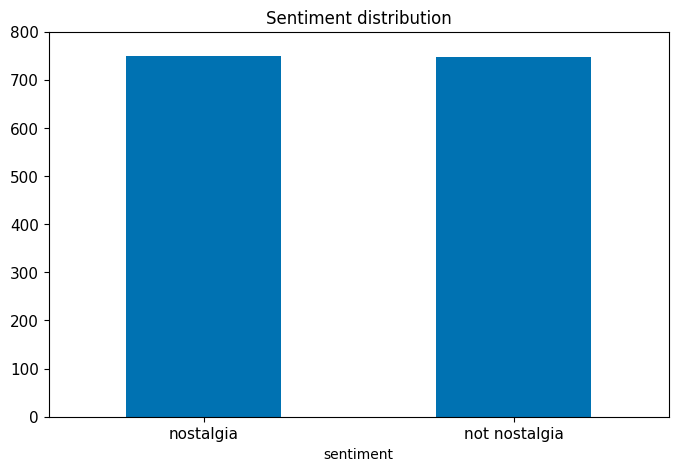

In [21]:
print(X.sentiment.value_counts())
upper_bound = max(X.sentiment.value_counts() + 50)

plt.style.use('seaborn-v0_8-colorblind')

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,5))

Check the 1000 smaple

sentiment
not nostalgia    502
nostalgia        498
Name: count, dtype: int64


<Axes: title={'center': 'Sample Sentiment distribution'}, xlabel='sentiment'>

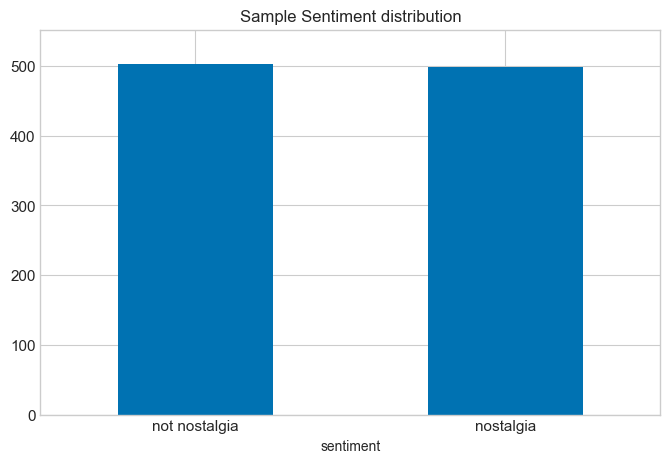

In [22]:
print(X_sample.sentiment.value_counts())
Sample_upper_bound = max(X_sample.sentiment.value_counts() + 50)

plt.style.use('seaborn-v0_8-whitegrid')

# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sample Sentiment distribution',
                                    ylim = [0, Sample_upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,5))

Compare both data counts

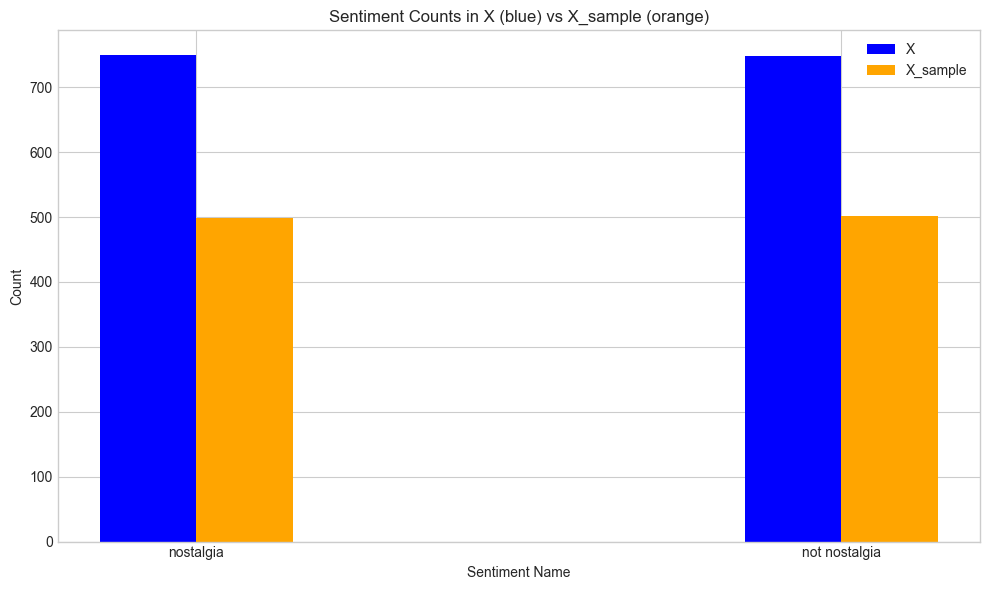

In [23]:
# Count occurrences of each sentiment in X and X_sample
sentiment_counts_X = X['sentiment'].value_counts()
sentiment_counts_sample = X_sample['sentiment'].value_counts()

# Create a common index with all sentiment from both dataframes
all_sentiments = sentiment_counts_X.index.union(sentiment_counts_sample.index)

# Align the counts for plotting (fill missing categories with 0)
sentiment_counts_X = sentiment_counts_X.reindex(all_sentiments, fill_value=0)
sentiment_counts_sample = sentiment_counts_sample.reindex(all_sentiments, fill_value=0)

# Plot
width = 0.15  # Width of the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Create an index for positioning the bars
indices = range(len(all_sentiments))

# Bar plot for X (blue)
ax.bar(indices, sentiment_counts_X, width, label='X', color='blue')

# Bar plot for X_sample (orange), with some offset for side-by-side comparison
ax.bar([i + width for i in indices], sentiment_counts_sample, width, label='X_sample', color='orange')

# Customize the plot
ax.set_xlabel('Sentiment Name')
ax.set_ylabel('Count')
ax.set_title('Sentiment Counts in X (blue) vs X_sample (orange)')
ax.set_xticks([i + width / 2 for i in indices])  # Center the x-axis labels
ax.set_xticklabels(all_sentiments)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Feature Creation

In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Sky Sky
[nltk_data]     Sky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Unigrams created

In [25]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [26]:
X[0:4]

comment  sentiment_status  \
0  He was a singer with a golden voice that I lov...               1.0   
1  The mist beautiful voice ever I listened to hi...               2.0   
2  I have most of Mr. Reeves songs.  Always love ...               2.0   
3  30 day leave from 1st tour in Viet Nam to conv...               1.0   

       sentiment                                           unigrams  
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...  
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...  
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...

## Feature Subset selection

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


### Check the term-document matrix we built.

In [28]:
# Check the shape of this matrix by:
X_counts.shape

(1498, 3730)

In [29]:
# obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

## Heat Map of document matrix

In [30]:
# Convert from sparse array to normal array
X_counts[0:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [31]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [32]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [33]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [34]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

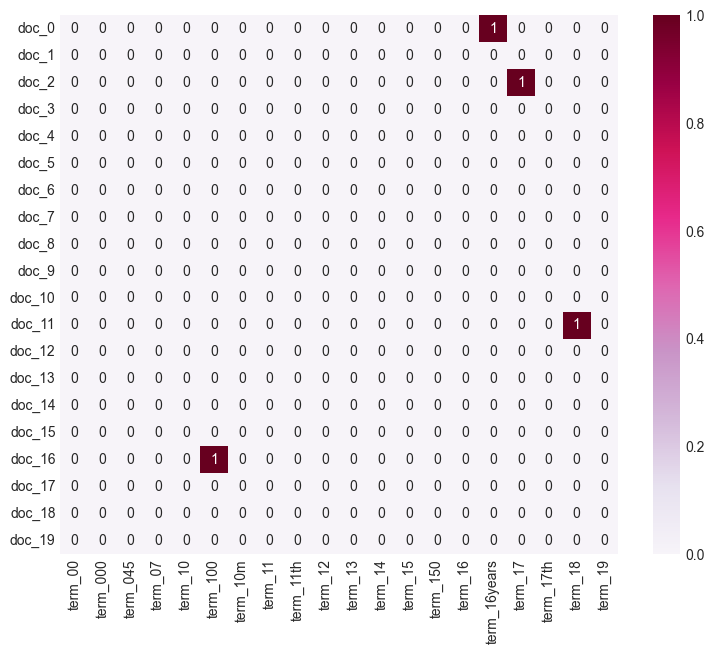

In [35]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Attribute transformation

### Compute these frequencies for each term in all documents; i.e., sum of each column.

In [36]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [37]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [38]:
term_frequencies[0] #sum of first term: 00

1

C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


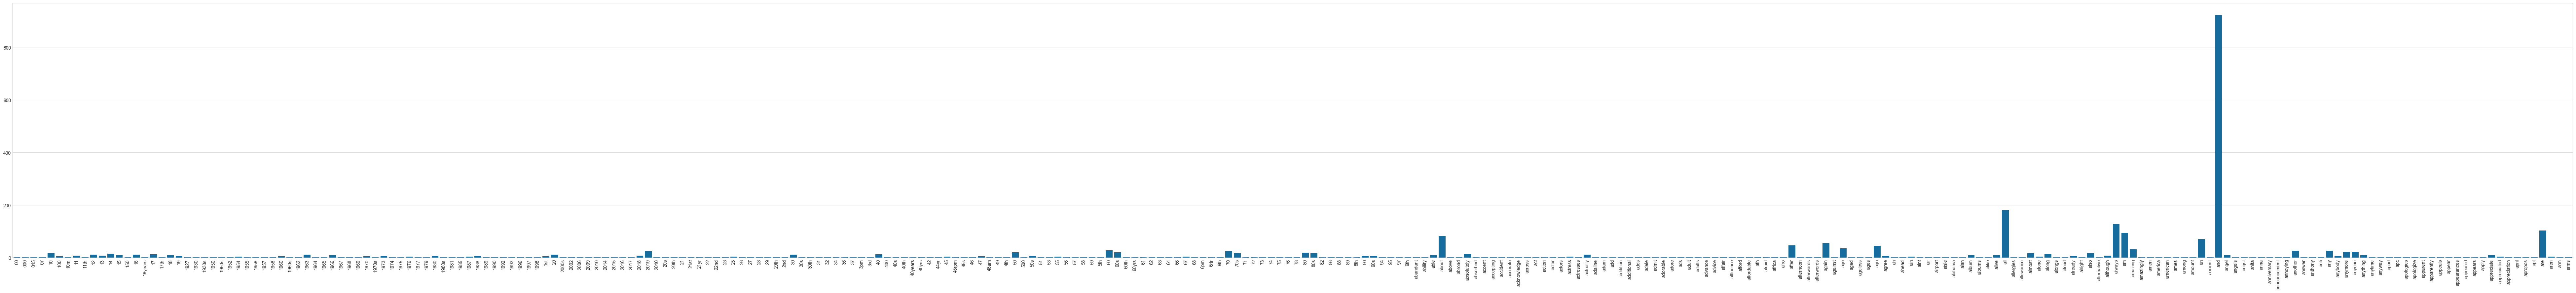

In [39]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [40]:
import plotly.express as px
import plotly.graph_objs as go
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Like the method of above cell
df_term_freq = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:100],
    'frequencies': term_frequencies[:100]
})

# Plotly diagram
fig = go.Figure([go.Bar(x=df_term_freq['terms'], y=df_term_freq['frequencies'])])

# Customize plot
fig.update_layout(
    title="Top 100 Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=-45,
    height=600,
    width=900
)

fig.show()

### transform the values in that vector into the log distribution.

In [41]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



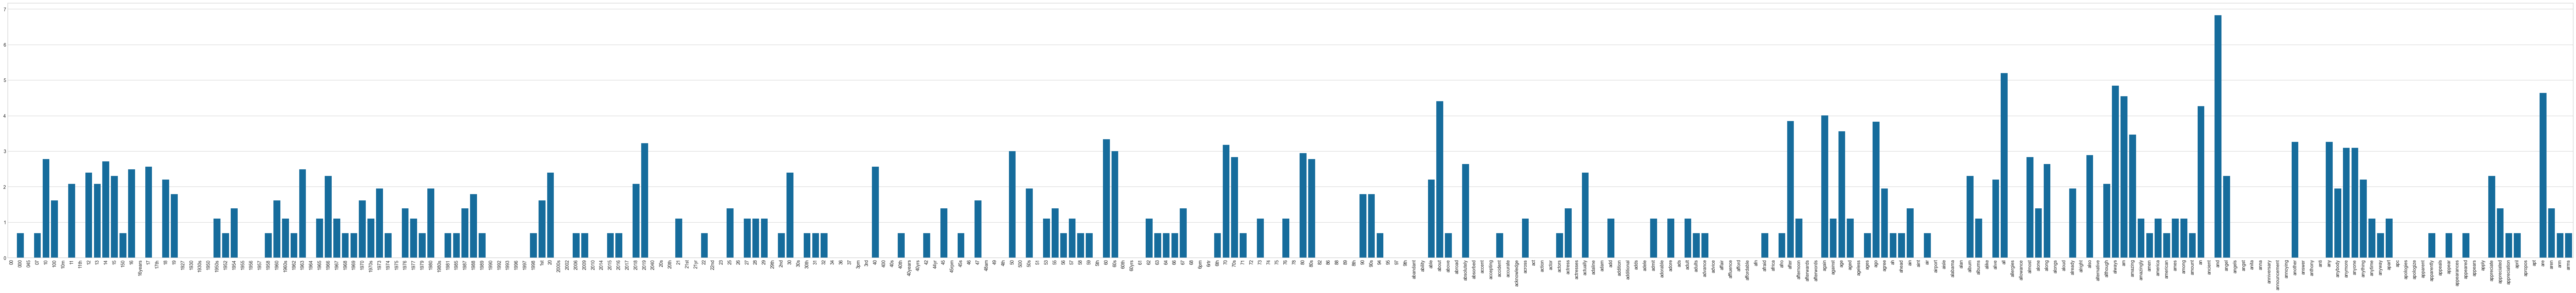

In [42]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## Finding frequent patterns using PAMI

### First modify new document-term matrix to be able to work for each category

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiments = X['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])


In [44]:
# Display the filtered DataFrame for one of the sentiment
sentiment_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

### Group the terms in bins and plot their frequency.

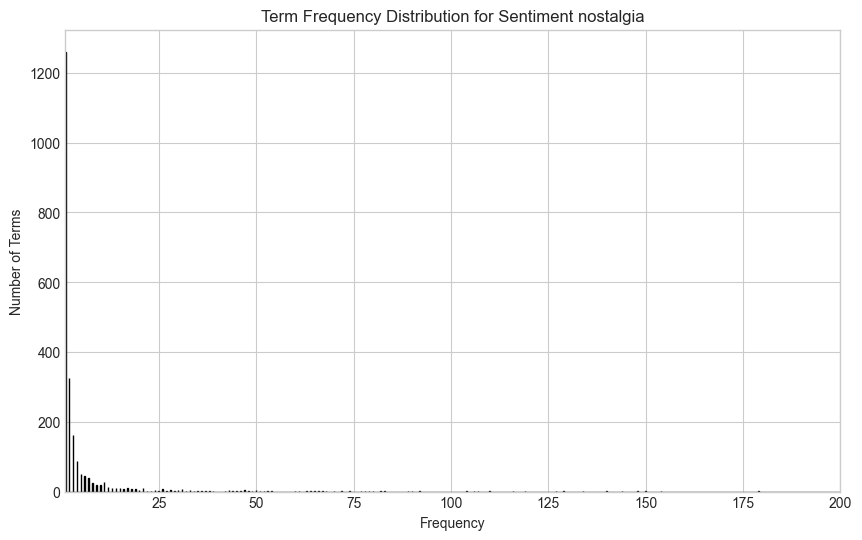

In [45]:
 # Sum over all documents to get total frequency for each word
sentiment_number=1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [46]:
sentiment_number=0
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed', 'glasgow', 'greater', 'greats', 'happiest', 'happening', 'happened', 'hansen', 'hanging', 'hanged', 'hang', 'handball', 'hand', 'hall', 'hadn', 'greatest', 'guy', 'gulf', 'guitarist', 'guess', 'guardhouse', 'guaranteed', 'growing', 'group', 'grocery', 'griffiths', 'greg', 'green', 'gut', 'glad', 'giving', 'gives', 'fresh', 'freedom', 'free', 'francisco', 'frames', 'found', 'fossils', 'forwards', 'forward', 'form', 'fork', 'front', 'forgive', 'ford', 'for', 'fool', 'following', 'follow', 'flying', 'floyd', 'flowing', 'flower', 'flowed', 'florida', 'forehead', 'fulfill', 'fully', 'funerals', 'given', 'give', 'gift', 'gf', 'gets', 'germa

In [47]:
sentiment_number=0
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies in ascending order

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'graphics', 'granted', 'grannys', 'grandsons', 'grandma', 'grandfathers', 'grandchildren', 'grandchild', 'gramaphone', 'graffiti', 'grade', 'great', 'grace', 'got', 'goosebumps', 'goodnight', 'goodness', 'gone', 'gold', 'going', 'goes', 'glitter', 'glimpses', 'glass', 'grabbed']


Filter top 5% and bottom 1% terms out of the dataframe.

In [48]:
sentiment_number=1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]


Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
0     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
1     0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
2     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
3     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
4     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..    ...      ...   
745   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
746   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
747   0   0   0     0   0   1   0   0   0   0  ...   0      0        0   
748   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
749   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

### Output the term frequency for both sentiment as csv file.

In [49]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

### Graph of Item Frequency Distribution and Transaction Length Distribution for not nostalgia

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


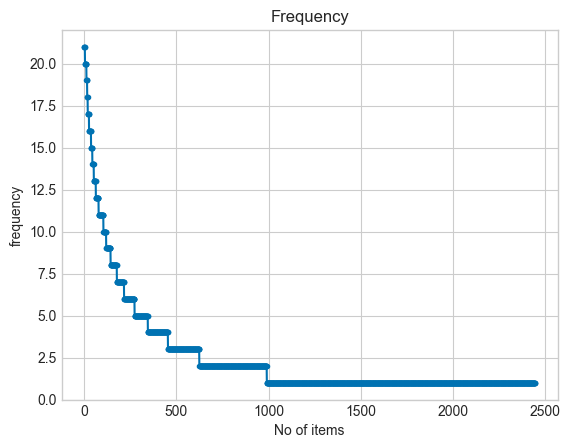

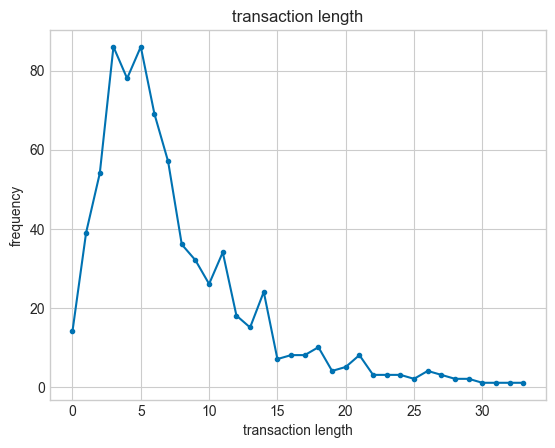

In [50]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Graph of Item Frequency Distribution and Transaction Length Distribution for nostalgia

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


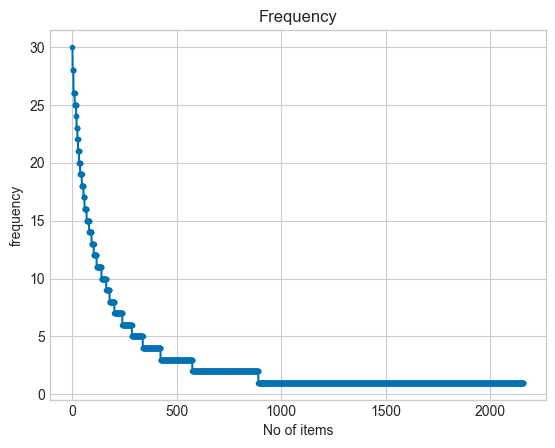

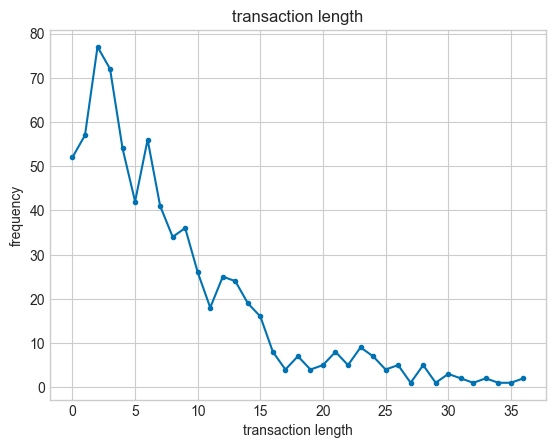

In [51]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Finding frequent patterns

In [52]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.01292109489440918


In [53]:
obj1.save('freq_patterns_not_nostalgia_minsup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [54]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.016632080078125


In [55]:
obj2.save('freq_patterns_nostalgia_minsup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

### Identify and use only the **unique patterns** that are specific to each category.

In [56]:
import pandas as pd

# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


### Integrate these now category-specific patterns into our data by converting the patterns into binary data within the columns of our document-term matrix.

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1498 rows x 3950 columns]

## Dimensionality Reduction

### Applying with PCA (linear dimensionality reduction), tSNE and UMAP

In [58]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

c:\users\sky sky sky\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\users\sky sky sky\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\sky sky sky\appdata\local\programs\python\python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\users\sky sky sky\appdata\local\programs\python\python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\users\sky sky sky\appdata\local\programs\python\python39\lib\subprocess.py", line 142

In [59]:
X_pca_tdm.shape

(1498, 2)

In [60]:
X_tsne_tdm.shape

(1498, 2)

In [61]:
X_umap_tdm.shape

(1498, 2)

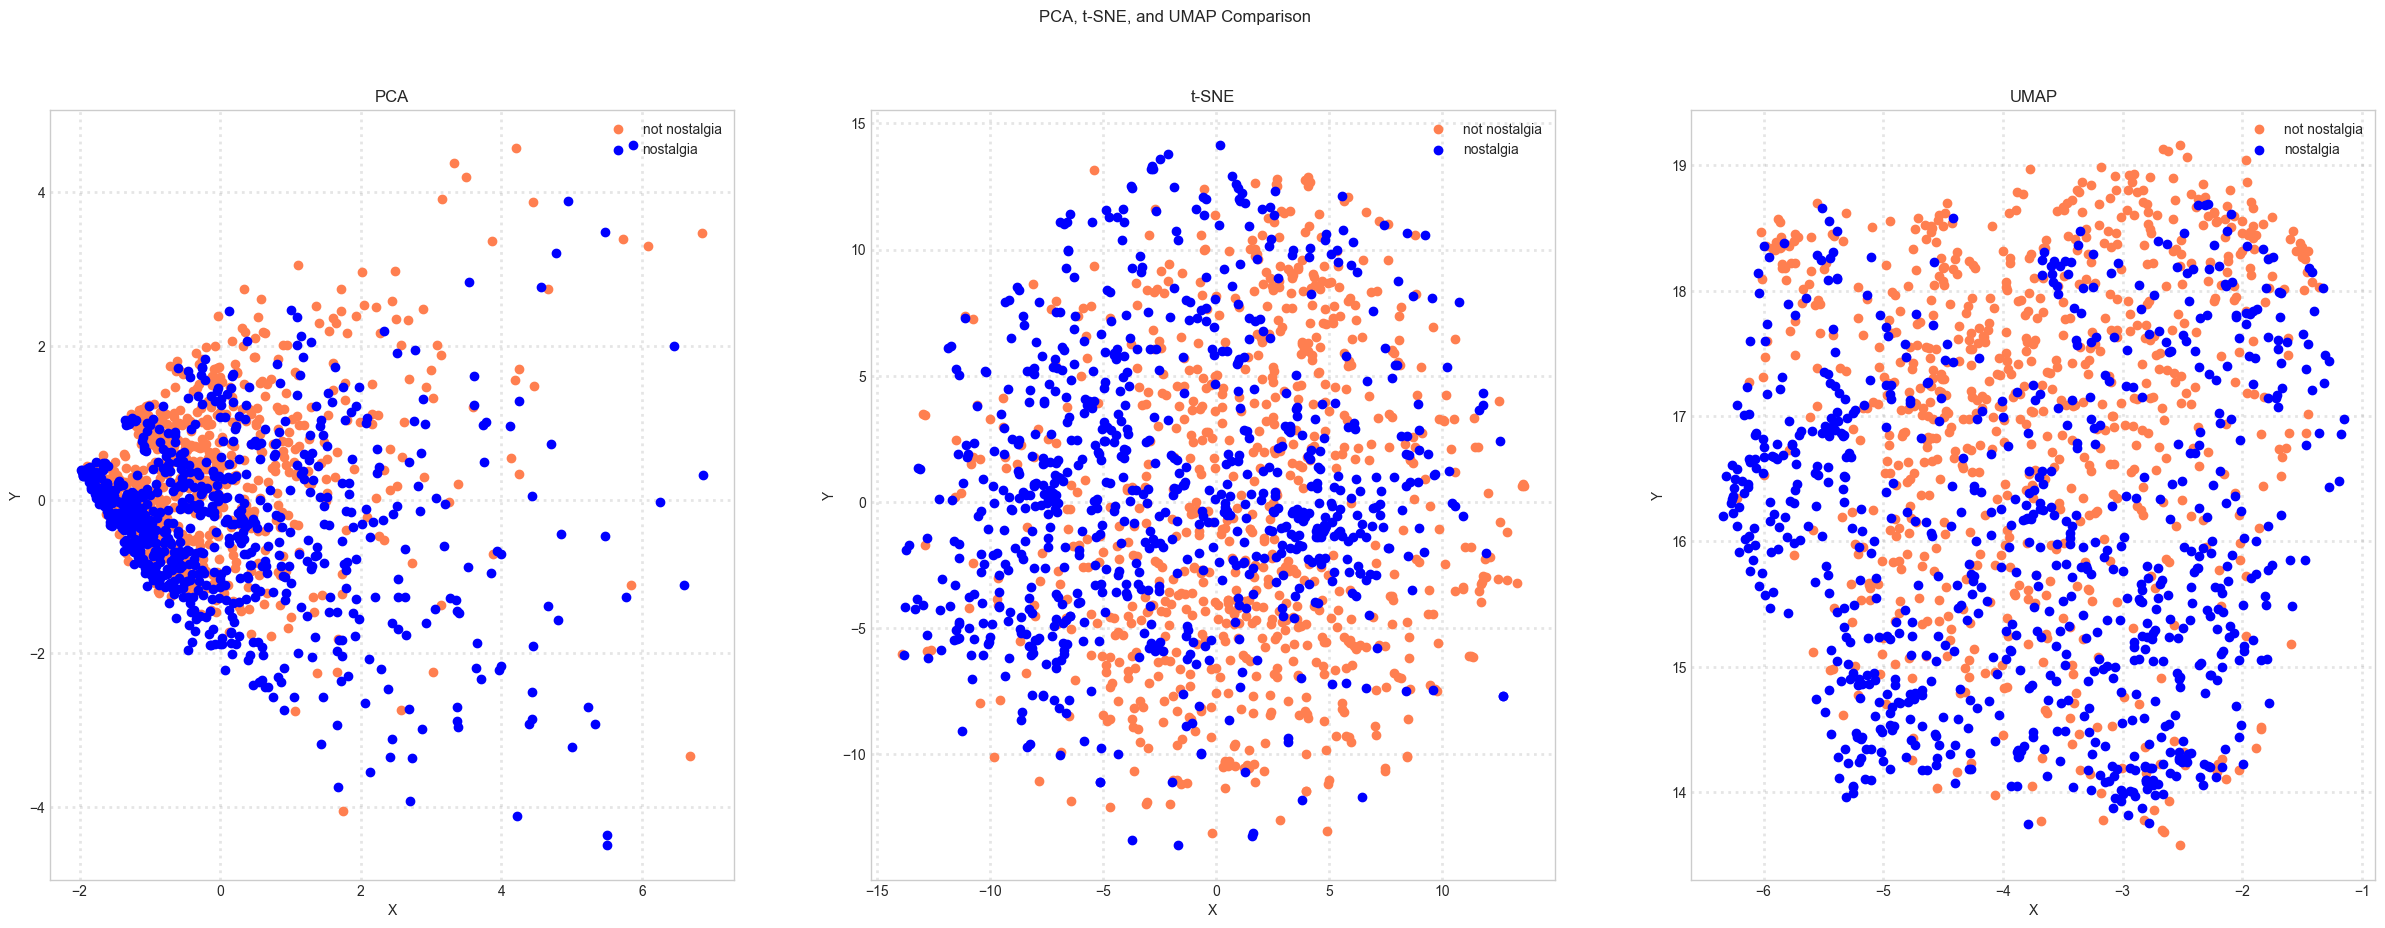

In [62]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [63]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

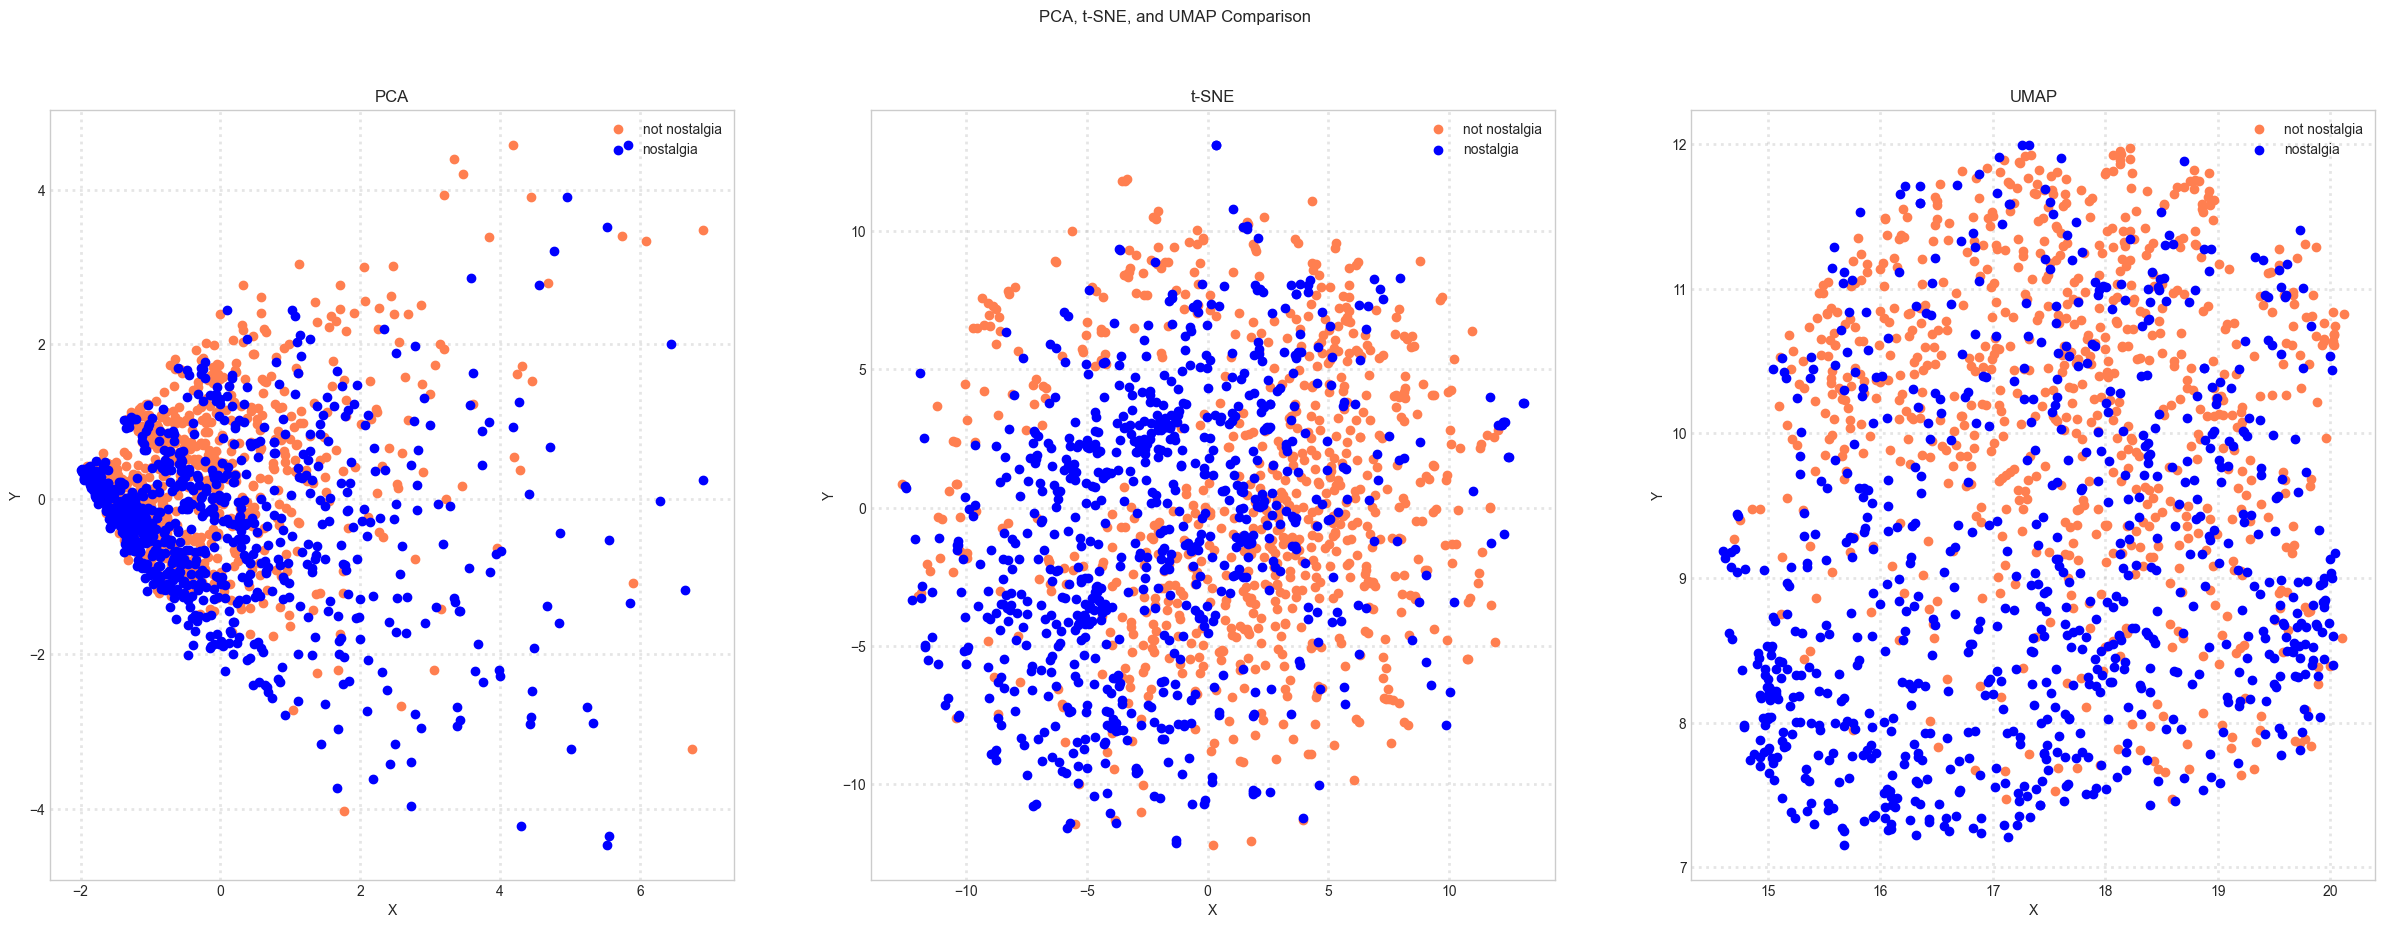

In [64]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### Reduce the dimension to 3, and plot the result use 3-D plot.

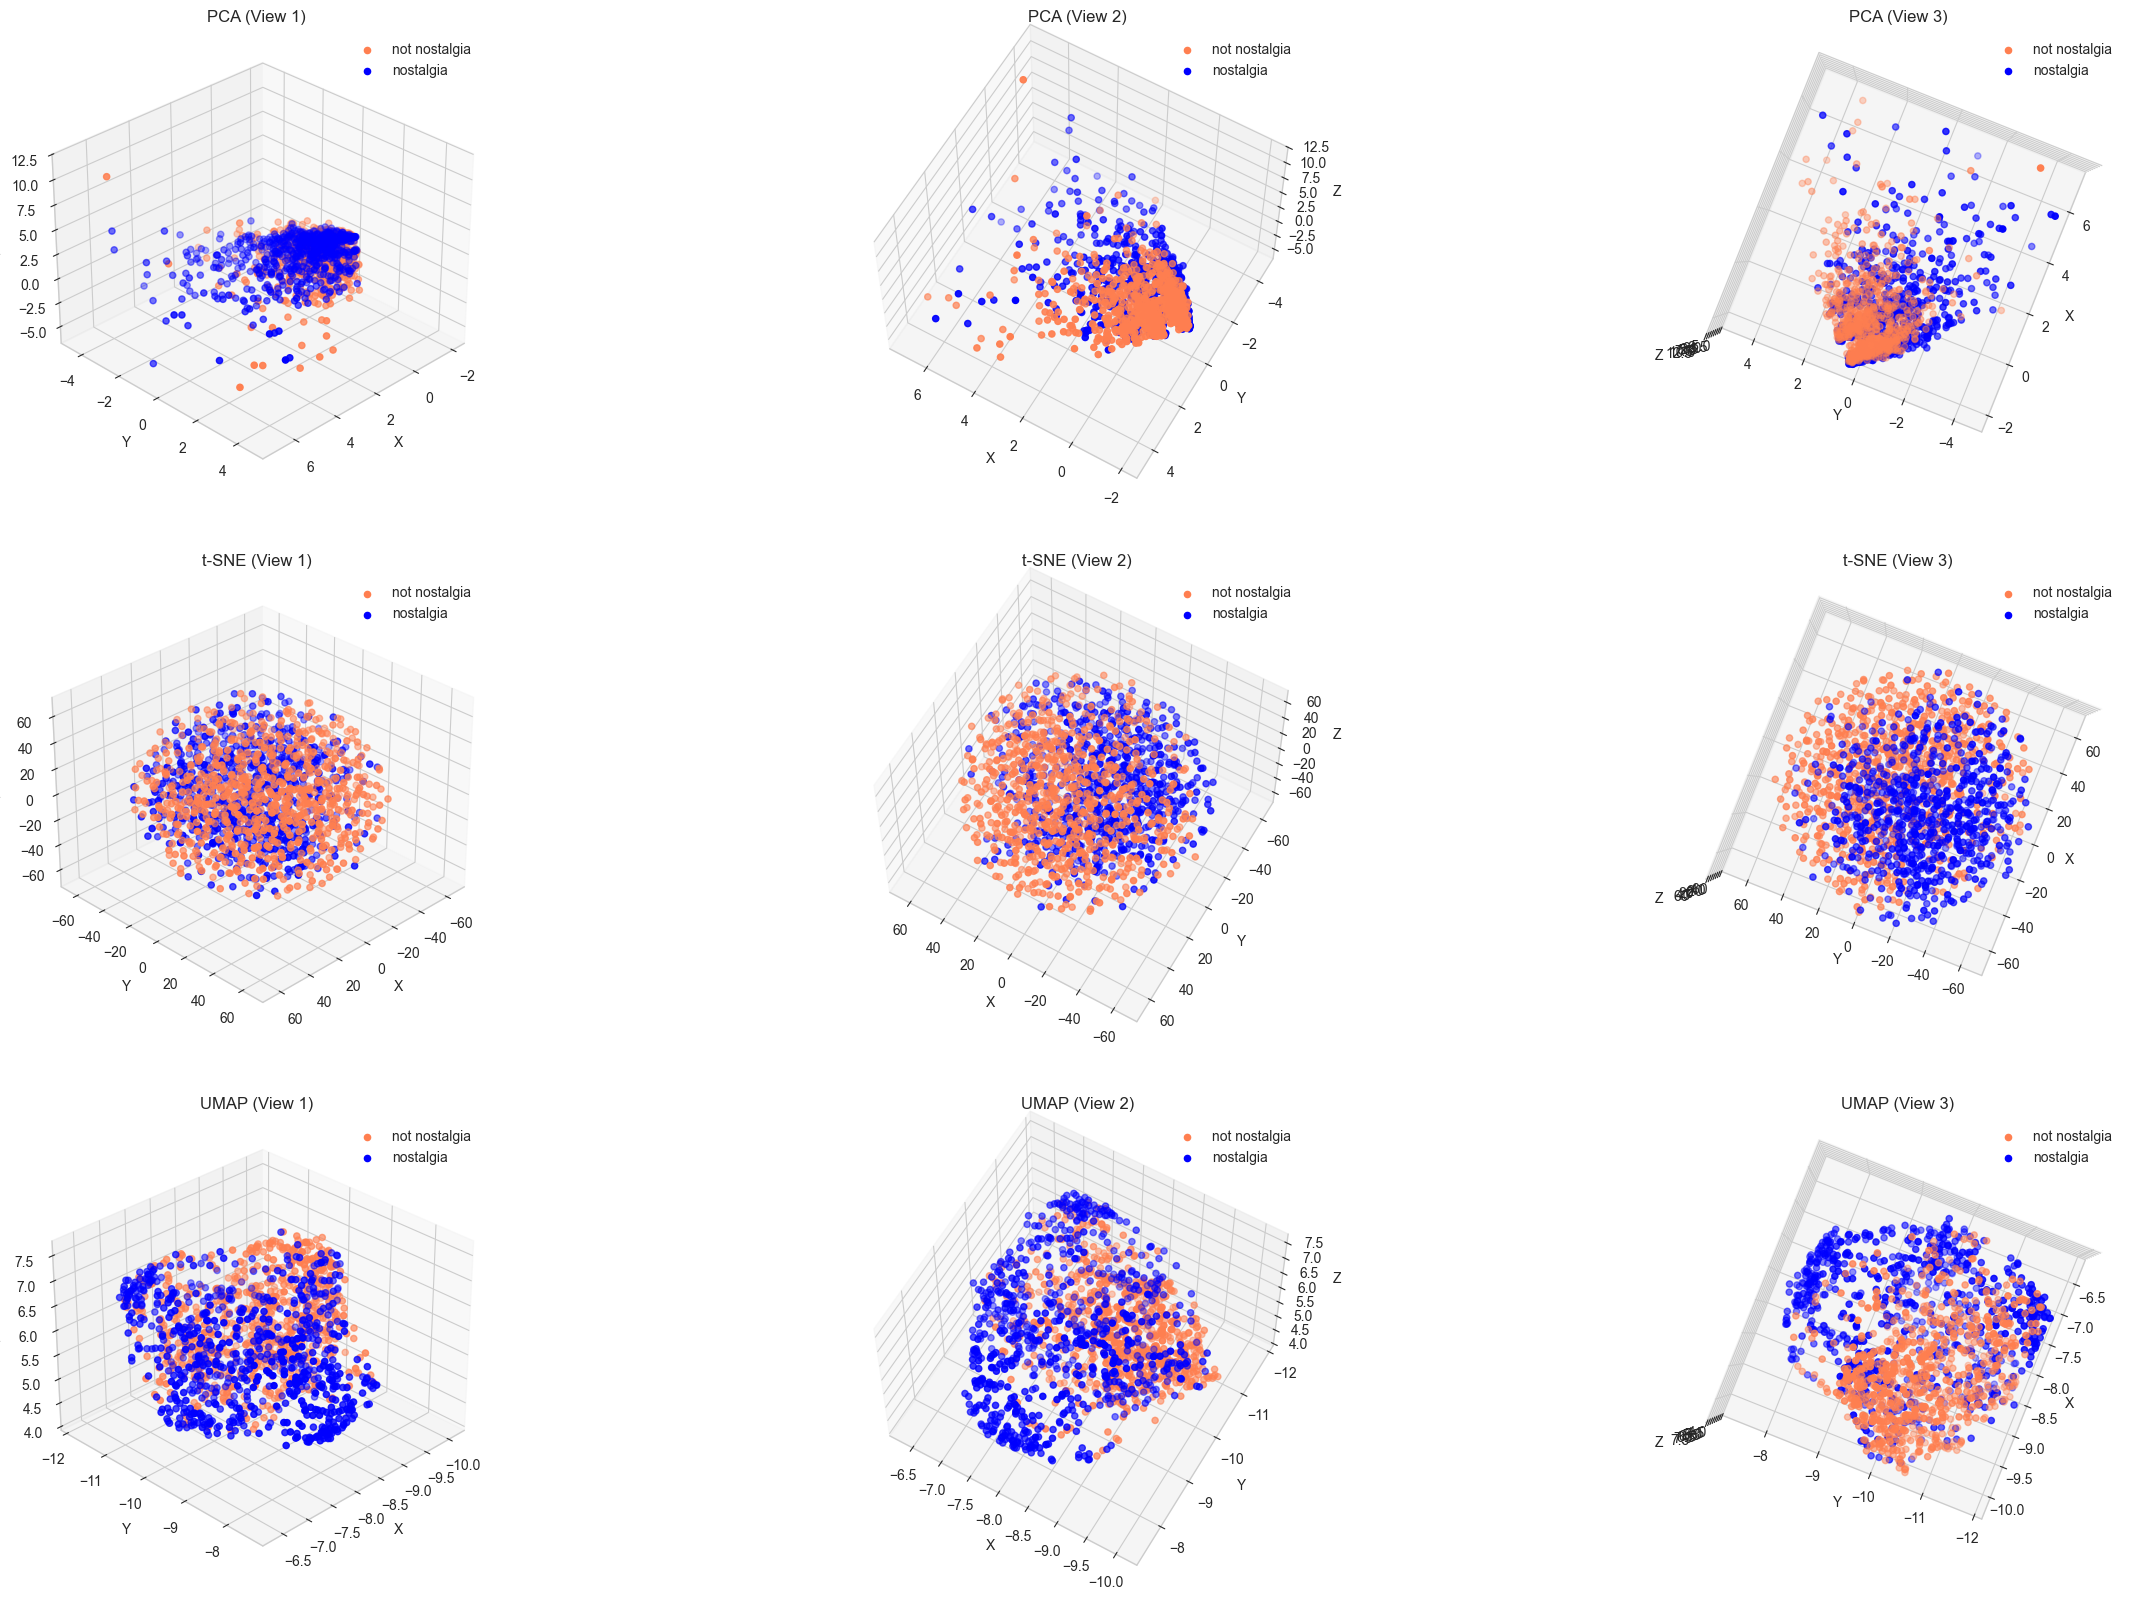

In [65]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

# Apply PCA, t-SNE, and UMAP to reduce to 3 dimensions
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Define a function to create a 3D scatter plot
def plot_scatter_3d(ax, X_reduced, title, angle1, angle2):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        zs = X_reduced[X['sentiment'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=angle1, azim=angle2)  # Set the camera angle
    ax.legend(loc='upper right')

# Create a 3D plot for PCA, t-SNE, and UMAP, with three camera angles
fig = plt.figure(figsize=(30, 20))

# Subplots for different views of PCA
ax1 = fig.add_subplot(3, 3, 1, projection='3d')
plot_scatter_3d(ax1, X_pca_aug_3d, 'PCA (View 1)', 30, 45)

ax2 = fig.add_subplot(3, 3, 2, projection='3d')
plot_scatter_3d(ax2, X_pca_aug_3d, 'PCA (View 2)', 60, 120)

ax3 = fig.add_subplot(3, 3, 3, projection='3d')
plot_scatter_3d(ax3, X_pca_aug_3d, 'PCA (View 3)', 90, 200)

# Subplots for different views of t-SNE
ax4 = fig.add_subplot(3, 3, 4, projection='3d')
plot_scatter_3d(ax4, X_tsne_aug_3d, 't-SNE (View 1)', 30, 45)

ax5 = fig.add_subplot(3, 3, 5, projection='3d')
plot_scatter_3d(ax5, X_tsne_aug_3d, 't-SNE (View 2)', 60, 120)

ax6 = fig.add_subplot(3, 3, 6, projection='3d')
plot_scatter_3d(ax6, X_tsne_aug_3d, 't-SNE (View 3)', 90, 200)

# Subplots for different views of UMAP
ax7 = fig.add_subplot(3, 3, 7, projection='3d')
plot_scatter_3d(ax7, X_umap_aug_3d, 'UMAP (View 1)', 30, 45)

ax8 = fig.add_subplot(3, 3, 8, projection='3d')
plot_scatter_3d(ax8, X_umap_aug_3d, 'UMAP (View 2)', 60, 120)

ax9 = fig.add_subplot(3, 3, 9, projection='3d')
plot_scatter_3d(ax9, X_umap_aug_3d, 'UMAP (View 3)', 90, 200)

plt.show()

## Discretization and Binarization

### Transform the data into a format that satisfies certain criteria required by particular algorithms.

In [66]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [67]:
mlb = preprocessing.LabelBinarizer()

In [68]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [69]:
X['bin_sentiment_status'] = mlb.transform(X['sentiment_status']).tolist()

In [70]:
X[0:10]

comment  sentiment_status  \
0  He was a singer with a golden voice that I lov...               1.0   
1  The mist beautiful voice ever I listened to hi...               2.0   
2  I have most of Mr. Reeves songs.  Always love ...               2.0   
3  30 day leave from 1st tour in Viet Nam to conv...               1.0   
4  listening to his songs reminds me of my mum wh...               2.0   
5  Every time I heard this song as a child, I use...               2.0   
6  My dad loved listening to Jim Reeves, when I w...               2.0   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...               2.0   
8           Wherever you  are you always in my heart               1.0   
9  Elvis will always be number one no one can com...               1.0   

       sentiment                                           unigrams  \
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...   
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...   
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4      nostalgia  [listening, to, his, songs, reminds, me, of, m...   
5      nostalgia  [Every, time, I, heard, this, song, as, a, chi...   
6      nostalgia  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7      nostalgia  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8  not nostalgia   [Wherever, you, are, you, always, in, my, heart]   
9  not nostalgia  [Elvis, will, always, be, number, one, no, one...   

                                   tokenized_comment bin_sentiment_status  
0  {great, but,, that, golden, the, hear, love, t...                  [0]  
1  {him, love, to, when, I, an, kid, mist, The, s...                  [0]  
2  {up, great, gentle,, Always, the, gentle, litt...                  [0]  
3  {that, Lou, the, 1st, Lou., 30, convince, This...                  [0]  
4  {his, me, mum, listening, him, songs, who, eve...                  [0]  
5  {death,, that, cry....because, heard, as, your...                  [0]  
6  {the, didn't, changes, to, when, things., then...                  [0]  
7  {the, childhood, love, ALSO, Reeves, ., now, t...                  [0]  
8        {heart, Wherever, are, you, my, in, always}                  [0]  
9  {can, place, his, to, the, one, close, taking,...                  [0]

In [71]:
# Initialize LabelBinarizer
mlb = preprocessing.LabelBinarizer()

# Fit and transform the 'category_name' column
X['bin_sentiment'] = mlb.fit_transform(X['sentiment']).tolist()

# Display the first few rows of the dataframe
X[0:10]

comment  sentiment_status  \
0  He was a singer with a golden voice that I lov...               1.0   
1  The mist beautiful voice ever I listened to hi...               2.0   
2  I have most of Mr. Reeves songs.  Always love ...               2.0   
3  30 day leave from 1st tour in Viet Nam to conv...               1.0   
4  listening to his songs reminds me of my mum wh...               2.0   
5  Every time I heard this song as a child, I use...               2.0   
6  My dad loved listening to Jim Reeves, when I w...               2.0   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...               2.0   
8           Wherever you  are you always in my heart               1.0   
9  Elvis will always be number one no one can com...               1.0   

       sentiment                                           unigrams  \
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...   
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...   
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4      nostalgia  [listening, to, his, songs, reminds, me, of, m...   
5      nostalgia  [Every, time, I, heard, this, song, as, a, chi...   
6      nostalgia  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7      nostalgia  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8  not nostalgia   [Wherever, you, are, you, always, in, my, heart]   
9  not nostalgia  [Elvis, will, always, be, number, one, no, one...   

                                   tokenized_comment bin_sentiment_status  \
0  {great, but,, that, golden, the, hear, love, t...                  [0]   
1  {him, love, to, when, I, an, kid, mist, The, s...                  [0]   
2  {up, great, gentle,, Always, the, gentle, litt...                  [0]   
3  {that, Lou, the, 1st, Lou., 30, convince, This...                  [0]   
4  {his, me, mum, listening, him, songs, who, eve...                  [0]   
5  {death,, that, cry....because, heard, as, your...                  [0]   
6  {the, didn't, changes, to, when, things., then...                  [0]   
7  {the, childhood, love, ALSO, Reeves, ., now, t...                  [0]   
8        {heart, Wherever, are, you, my, in, always}                  [0]   
9  {can, place, his, to, the, one, close, taking,...                  [0]   

  bin_sentiment  
0           [1]  
1           [0]  
2           [0]  
3           [1]  
4           [0]  
5           [0]  
6           [0]  
7           [0]  
8           [1]  
9           [1]

---

# Data Exploration

In [72]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [73]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [74]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [75]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Sky Sky Sky\AppData\Local\Temp\ipykernel_26352\452772485.py:17: DeprecationWarning:

Conversion of an a

---

# Data Classification

### Implement a Multinomial Naive Bayes

In [76]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_status', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_status'], test_size=0.3, random_state=42)

In [77]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [78]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [79]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [80]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_status', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_status'], test_size=0.3, random_state=42)

In [81]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
890    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1397   0    0    0   0   0    0    0   0     0   0  ...       0       0   
709    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1273   0    0    0   0   0    0    0   0     0   0  ...       0       1   
940    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1132   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1296   0    0    0   0   0    0    0   0     0   0  ...       0       0   
862    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1461   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1128   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
890        0       0     0         0        0   0      0    0  
1397       0       0     0         0        0   0      0    0  
709        0       0     0         0        0   0      0    0  
1273       0       0     0         0        0   0      0    0  
940        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1132       0       0     0         0        0   0      0    0  
1296       0       0     0         0        0   0      0    0  
862        0       0     0         0        0   0      0    0  
1461       0       0     0         0        0   0      0    0  
1128       0       0     0         0        0   0      0    0  

[1048 rows x 3950 columns]

In [82]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
1035   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1307   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1437   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1491   0    0    0   0   0    0    0   0     0   0  ...       0       0   
790    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1231   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1275   0    0    0   0   0    0    0   0     0   0  ...       0       0   
484    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1329   0    0    0   0   0    0    0   0     0   0  ...       0       0   
201    0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
1035       0       0     0         0        0   0      0    0  
1307       0       0     0         0        0   0      0    0  
1437       0       0     0         0        0   0      0    0  
1491       0       0     0         0        0   0      0    0  
790        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1231       0       0     0         0        0   0      0    0  
1275       0       0     0         0        0   0      0    0  
484        0       0     0         0        0   0      0    0  
1329       0       0     0         0        0   0      0    0  
201        0       0     0         0        0   0      0    0  

[450 rows x 3950 columns]

In [83]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9289    0.8305    0.8770       236
    nostalgia     0.8326    0.9299    0.8786       214

     accuracy                         0.8778       450
    macro avg     0.8808    0.8802    0.8778       450
 weighted avg     0.8831    0.8778    0.8777       450



---

# Part 3 

## Generate new data visualization

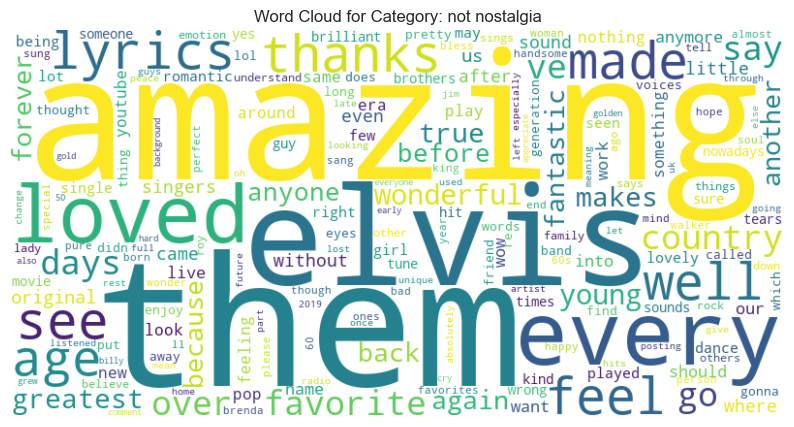

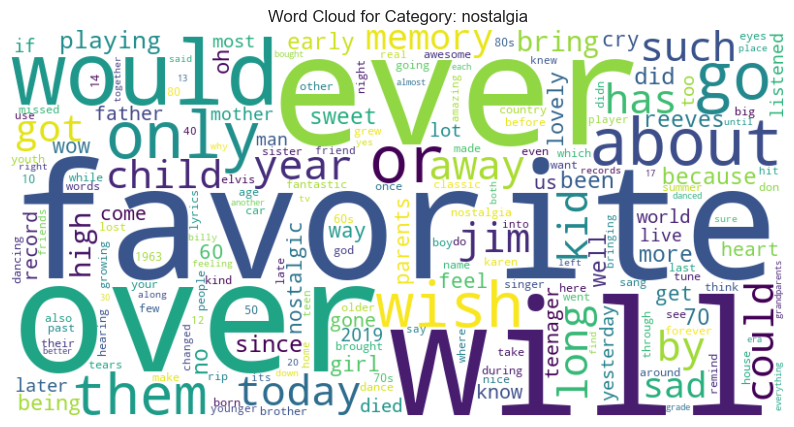

In [84]:
from wordcloud import WordCloud

def plot_word_cloud(term_document_df, sentiment):
    word_freq = term_document_df.sum(axis=0).to_dict()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Category: {sentiment}")
    plt.axis('off')
    plt.show()

for sentiment, term_document_df in filtered_term_document_dfs.items():
    plot_word_cloud(term_document_df, sentiment)

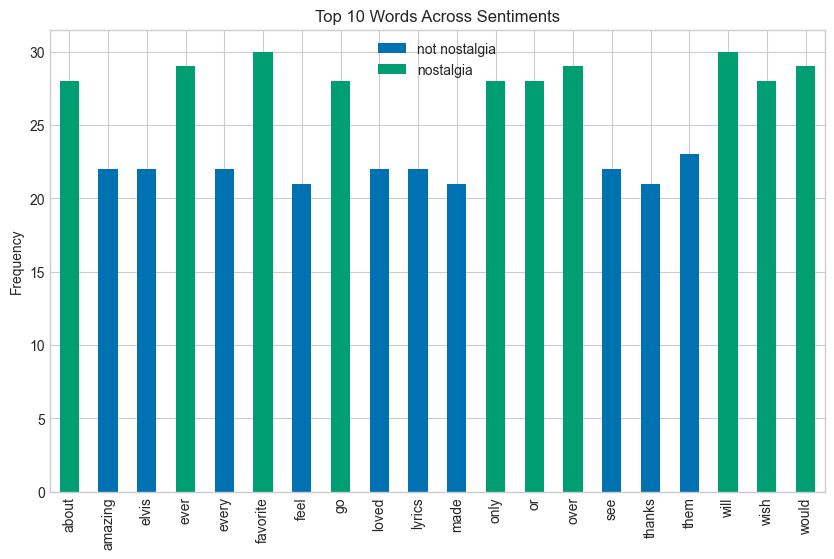

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.decomposition import PCA

# Top N Words Across Categories (Inter-world Comparison)
def plot_top_n_words_across_categories(filtered_term_document_dfs, n=10):
    top_words = {}
    for sentiment, term_document_df in filtered_term_document_dfs.items():
        top_words[sentiment] = term_document_df.sum(axis=0).nlargest(n)
    top_words_df = pd.DataFrame(top_words)
    top_words_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"Top {n} Words Across Sentiments")
    plt.ylabel('Frequency')
    plt.show()

plot_top_n_words_across_categories(filtered_term_document_dfs, n=10)

## Generate TF-IDF features from the tokens of each text

In [86]:
X['tokenized_comment']

0       {great, but,, that, golden, the, hear, love, t...
1       {him, love, to, when, I, an, kid, mist, The, s...
2       {up, great, gentle,, Always, the, gentle, litt...
3       {that, Lou, the, 1st, Lou., 30, convince, This...
4       {his, me, mum, listening, him, songs, who, eve...
                              ...                        
1495    {that, Richard, the, as, Simmons, going, sugge...
1496    {really, him, love, your, it's, to, when, song...
1497    {that, not, age, to, when, am, music., I, glad...
1498    {aware, really, the, captured, as, love, never...
1499    {up, rolled, the, love, divorce, This, CD, mar...
Name: tokenized_comment, Length: 1498, dtype: object

In [87]:
term_document_df

07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
0     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
1     0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
2     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
3     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
4     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..    ...      ...   
745   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
746   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
747   0   0   0     0   0   1   0   0   0   0  ...   0      0        0   
748   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
749   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Define a custom tokenizer to pass into TfidfVectorizer (uses tokenize_text)
def custom_tokenizer(text):
    return dmh.tokenize_text(text)

# Step 2: Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words='english')

# Step 3: Fit and transform the text data to compute TF-IDF values
### Do not use the tokenized data, since it will tokenize in this function internally.
tfidf_matrix = tfidf_vectorizer.fit_transform(X['comment'])

# Step 4: Create a DataFrame from the TF-IDF matrix
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Display the resulting TF-IDF DataFrame (first 10 rows)
tfidf_df

c:\users\sky sky sky\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



!    #    %    &    '       ''  '50s/early  '60  '60s  '67  ...  \
0     0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
1     0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
2     0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
3     0.000000  0.0  0.0  0.0  0.0  0.09628         0.0  0.0   0.0  0.0  ...   
4     0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
...        ...  ...  ...  ...  ...      ...         ...  ...   ...  ...  ...   
1493  0.363224  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
1494  0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
1495  0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
1496  0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   
1497  0.000000  0.0  0.0  0.0  0.0  0.00000         0.0  0.0   0.0  0.0  ...   

      youngster  youngsters  youth  youthful  youtube  yrs  yuo  yup  zealand  \
0           0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
1           0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
2           0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
3           0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
4           0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
...         ...         ...    ...       ...      ...  ...  ...  ...      ...   
1493        0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
1494        0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
1495        0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
1496        0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   
1497        0.0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0   

      zulus.barbados  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
1493             0.0  
1494             0.0  
1495             0.0  
1496             0.0  
1497             0.0  

[1498 rows x 3718 columns]

### Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.

In [89]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X['comment'] contains raw text and X['sentiment_status'] contains the labels (1 for not_nostalgia, 2 for nostalgia)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X['comment'], X['sentiment_status'], test_size=0.3, random_state=42)

### Part 1: Word Frequency Features (Multinomial Naive Bayes)

# Step 1: Initialize CountVectorizer for word frequency features
count_vectorizer = CountVectorizer(stop_words='english')

# Step 2: Fit and transform the training text data
X_train_counts = count_vectorizer.fit_transform(X_train)

# Step 3: Transform the test text data
X_test_counts = count_vectorizer.transform(X_test)

# Step 4: Train Multinomial Naive Bayes Classifier
nb_word_freq = MultinomialNB()
nb_word_freq.fit(X_train_counts, y_train)

# Step 5: Make predictions and evaluate the performance
y_pred_word_freq = nb_word_freq.predict(X_test_counts)
print("Accuracy with Word Frequency Features (MultinomialNB):", accuracy_score(y_test, y_pred_word_freq))
print("Classification Report (Word Frequency Features):\n", classification_report(y_test, y_pred_word_freq))

### Part 2: TF-IDF Features (Complement Naive Bayes)

# Step 1: Initialize TfidfVectorizer for TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Step 2: Fit and transform the training text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Step 3: Transform the test text data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Train Complement Naive Bayes Classifier (better suited for TF-IDF)
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Step 5: Make predictions and evaluate the performance
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("\nAccuracy with TF-IDF Features (BernoulliNB):", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report (TF-IDF Features):\n", classification_report(y_test, y_pred_tfidf))

Accuracy with Word Frequency Features (MultinomialNB): 0.8422222222222222
Classification Report (Word Frequency Features):
               precision    recall  f1-score   support

         1.0       0.96      0.73      0.83       236
         2.0       0.77      0.96      0.85       214

    accuracy                           0.84       450
   macro avg       0.86      0.85      0.84       450
weighted avg       0.87      0.84      0.84       450


Accuracy with TF-IDF Features (BernoulliNB): 0.8688888888888889
Classification Report (TF-IDF Features):
               precision    recall  f1-score   support

         1.0       0.95      0.79      0.86       236
         2.0       0.81      0.95      0.87       214

    accuracy                           0.87       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.88      0.87      0.87       450



Since the data in Master notebook works well for balanced datasets where each class has a similar number of documents. The formula counts feature occurrences and uses these counts to calculate conditional probabilities for each class. On the other hand, Bernoulli Naive Bayes Classifier expects binary feature vectors which works well for the present dataset. However, losing granularity is visible in this method, we can verify this through the output above. It's only about 86% accuracy. Nevertheless, no outcome from other classifier can reach this height.

---

# Part 4 is attahced below the master notebook.